# Колодий Антон, гр. 8376

# Описание датасета
Я выбрал набор данных, полученных из Национального института диабета(США). Цель набора данных - диагностически предсказать, есть ли у пациента диабет на основе некоторых независимых переменных: число беременностей, глюкоза в крови, давление и т.д.
Все пациенты здесь - женщины в возрасте не менее 21 года, имеющие индейское происхождение Пима.

In [153]:
import numpy as np
import pandas as pd

Прочитаем данные из набора и получим информацию по нему.

In [154]:
diab_df = pd.read_csv('diabetes.csv')
diab_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies - Беременности: Для выражения количества беременностей

Glucose	- Глюкоза: Для определения уровня глюкозы в крови

BloodPressure - Кровяное давление: Для выражения результатов измерения кровяного давления

SkinThickness - Тонкость кожи: для определения толщины кожи

Insulin - Инсулин: Для определения уровня инсулина в крови

BMI - ИМТ: для выражения индекса массы тела

Функция DiabetesPedigreeFunction: Для выражения процентного содержания диабета

Age - Возраст: Для обозначения возраста

Outcome - Результат: Для выражения конечного результата 1 равно "ДА", o равно "НЕТ".

In [155]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


По каждому атрибуту кроме результата будем определять следующие параметры.

# Среднее значение и СКО

In [156]:
#Средние значения по каждому атрибуту
diab_df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [157]:
#СКО по каждому атрибуту
diab_df.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

Примечание: Здесь не нужно смотреть на Outcome, поскольку он логический (да/нет), а не вероятностный.

# Гистограммы
Гистограмма - график распределения.

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, stats

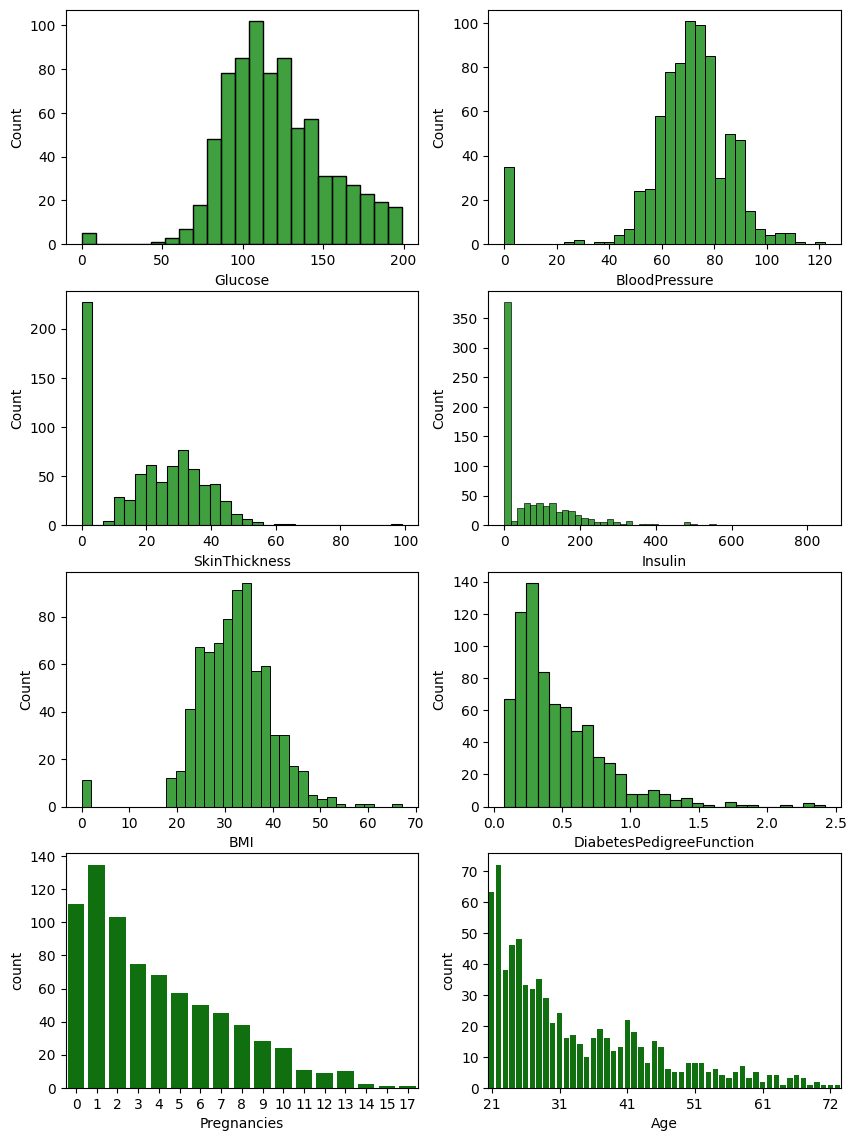

In [159]:
fig, ax = plt.subplots(4,2, figsize=(10,14))

sns.histplot(data=diab_df, x='Glucose', color='green', ax=ax[0,0])
sns.histplot(data=diab_df, x='BloodPressure', color='green', ax=ax[0,1])

sns.histplot(data=diab_df, x='SkinThickness', color='green', ax=ax[1,0], bins=30)
sns.histplot(data=diab_df, x='Insulin', color='green', ax=ax[1,1], bins=50)

sns.histplot(data=diab_df, x='BMI', color='green', ax=ax[2,0])
sns.histplot(data=diab_df, x='DiabetesPedigreeFunction', color='green', ax=ax[2,1])

sns.countplot(data=diab_df, x='Pregnancies', color='green', ax=ax[3,0])
sns.countplot(data=diab_df, x='Age', color='green', ax=ax[3,1])
ax[3,1].set_xticks([0,10,20,30,40,50]);

Из графиков видно, что выбросные значения это нули у инсулина,глюкозы,толщины кожи и индекса массы тела, а также кровяного давления.

Исключим выбросы и построим графики.

# Метод межквартильного диапазона

In [160]:
#Определим выбросы методом межквартильного диапазона
Q1 = diab_df.quantile(q=.25)
Q3 = diab_df.quantile(q=.75)
IQR = Q3-Q1
diab_quantile_df = diab_df[~((diab_df < (Q1-1.5*IQR)) | (diab_df > (Q3+1.5*IQR))).any(axis=1)]
diab_quantile_df.shape
diab_quantile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               639 non-null    int64  
 1   Glucose                   639 non-null    int64  
 2   BloodPressure             639 non-null    int64  
 3   SkinThickness             639 non-null    int64  
 4   Insulin                   639 non-null    int64  
 5   BMI                       639 non-null    float64
 6   DiabetesPedigreeFunction  639 non-null    float64
 7   Age                       639 non-null    int64  
 8   Outcome                   639 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.9 KB


# Метод Z-оценки

In [161]:
z = np.abs(stats.zscore(diab_df))
diab_z_df = diab_df[(z<3).all(axis=1)]
diab_z_df.shape
diab_z_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               688 non-null    int64  
 1   Glucose                   688 non-null    int64  
 2   BloodPressure             688 non-null    int64  
 3   SkinThickness             688 non-null    int64  
 4   Insulin                   688 non-null    int64  
 5   BMI                       688 non-null    float64
 6   DiabetesPedigreeFunction  688 non-null    float64
 7   Age                       688 non-null    int64  
 8   Outcome                   688 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 53.8 KB


Построим еще гистограммы, в этот раз сравнивая оба метода и изначальную гистограмму.

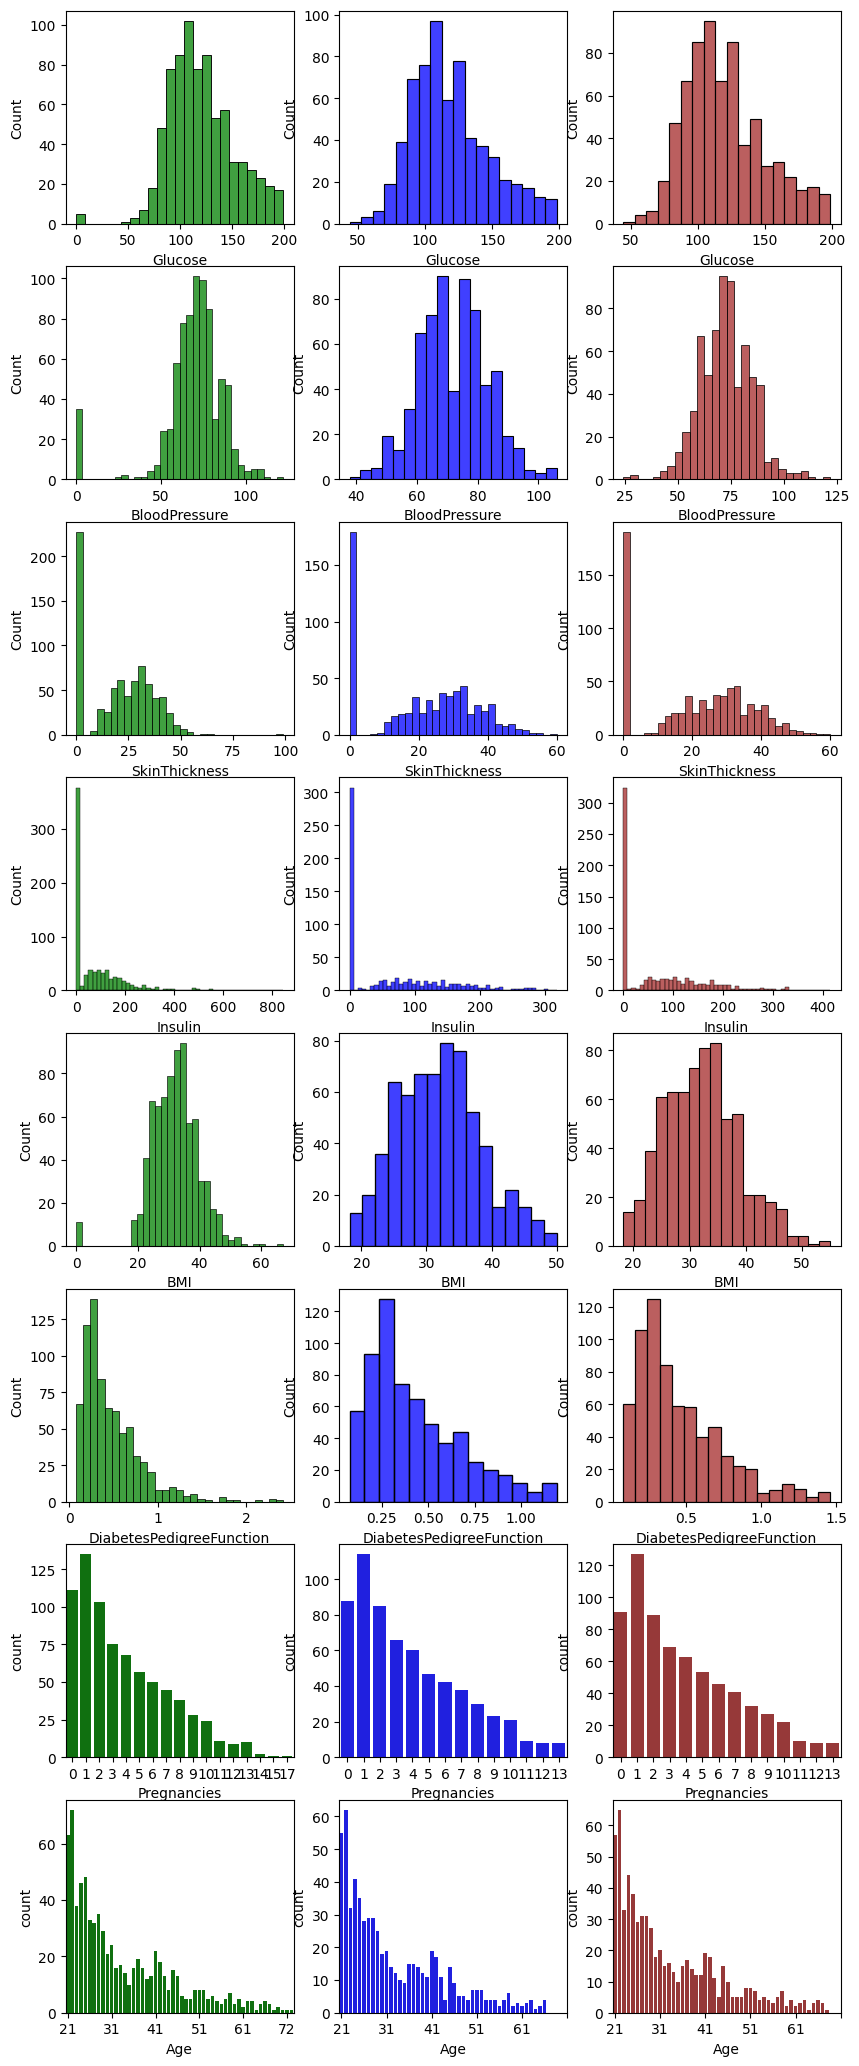

In [162]:
fig, ax = plt.subplots(8,3, figsize=(10,26))

sns.histplot(data=diab_df, x='Glucose', color='green', ax=ax[0,0])
sns.histplot(data=diab_quantile_df, x='Glucose', color='blue', ax=ax[0,1])
sns.histplot(data=diab_z_df, x='Glucose', color='brown', ax=ax[0,2])

sns.histplot(data=diab_df, x='BloodPressure', color='green', ax=ax[1,0])
sns.histplot(data=diab_quantile_df, x='BloodPressure', color='blue', ax=ax[1,1])
sns.histplot(data=diab_z_df, x='BloodPressure', color='brown', ax=ax[1,2])

sns.histplot(data=diab_df, x='SkinThickness', color='green', ax=ax[2,0], bins=30)
sns.histplot(data=diab_quantile_df, x='SkinThickness', color='blue', ax=ax[2,1], bins=30)
sns.histplot(data=diab_z_df, x='SkinThickness', color='brown', ax=ax[2,2], bins=30)

sns.histplot(data=diab_df, x='Insulin', color='green', ax=ax[3,0], bins=50)
sns.histplot(data=diab_quantile_df, x='Insulin', color='blue', ax=ax[3,1], bins=50)
sns.histplot(data=diab_z_df, x='Insulin', color='brown', ax=ax[3,2], bins=50)

sns.histplot(data=diab_df, x='BMI', color='green', ax=ax[4,0])
sns.histplot(data=diab_quantile_df, x='BMI', color='blue', ax=ax[4,1])
sns.histplot(data=diab_z_df, x='BMI', color='brown', ax=ax[4,2])

sns.histplot(data=diab_df, x='DiabetesPedigreeFunction', color='green', ax=ax[5,0])
sns.histplot(data=diab_quantile_df, x='DiabetesPedigreeFunction', color='blue', ax=ax[5,1])
sns.histplot(data=diab_z_df, x='DiabetesPedigreeFunction', color='brown', ax=ax[5,2])


sns.countplot(data=diab_df, x='Pregnancies', color='green', ax=ax[6,0])
sns.countplot(data=diab_quantile_df, x='Pregnancies', color='blue', ax=ax[6,1])
sns.countplot(data=diab_z_df, x='Pregnancies', color='brown', ax=ax[6,2])

sns.countplot(data=diab_df, x='Age', color='green', ax=ax[7,0])
sns.countplot(data=diab_quantile_df, x='Age', color='blue', ax=ax[7,1])
sns.countplot(data=diab_z_df, x='Age', color='brown', ax=ax[7,2])

ax[7,0].set_xticks([0,10,20,30,40,50]);
ax[7,1].set_xticks([0,10,20,30,40,50]);
ax[7,2].set_xticks([0,10,20,30,40,50]);

Видно, что выбросы для индекса массы тела, кровяного давления и глюкозы были убраны в обоих методах. Но инсулин и толщина кожи в районе 0 не ушли, потому что таких значений слишком много и их можно просто удалить вручную.

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

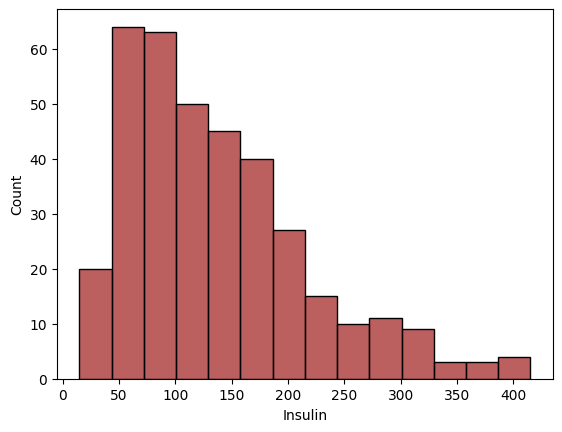

In [163]:
#Например, по инсулину
diab_z_df = diab_z_df[diab_z_df['Insulin'] > 0]
sns.histplot(data=diab_z_df, x='Insulin', color='brown')

Я не могу однозначно сказать надо ли удалять выбросы в этом наборе данных, потому что удалив строку с инсулином, мы потеряем важные данные по глюкозе и так далее.

# Пропущенные значения

In [164]:
for a in diab_df.columns[:-1]:
    missing_vals = diab_df[a].isnull().sum()
    print('В столбце '+ a + ' ' + str(missing_vals) + ' пропущенных значений')

В столбце Pregnancies 0 пропущенных значений
В столбце Glucose 0 пропущенных значений
В столбце BloodPressure 0 пропущенных значений
В столбце SkinThickness 0 пропущенных значений
В столбце Insulin 0 пропущенных значений
В столбце BMI 0 пропущенных значений
В столбце DiabetesPedigreeFunction 0 пропущенных значений
В столбце Age 0 пропущенных значений


# Корреляция
Независимые переменные не влияют друг на друга, поэтому я не буду рассматривать, например, корреляцию глюкозы и толщины кожи.

In [165]:
#Сначала корреляция всех атрибутов с результатом
lst_str =['Корреляция между количеством беременностей и диабетом ', 'Корреляция между уровнем глюкозы и диабетом ', 'Корреляция между кровяным давлением и диабетом ','Корреляция между толщиной кожи и диабетом ','Корреляция между уровнем инсулина и диабетом ','Корреляция между индексом массы тела и диабетом ','Корреляция между функцией DPF и диабетом ','Корреляция между возрастом и диабетом ']
lst=[]
lst.append(diab_df['Pregnancies']. corr(diab_df['Outcome']))
lst.append(diab_df['Glucose']. corr(diab_df['Outcome']))
lst.append(diab_df['BloodPressure']. corr(diab_df['Outcome']))
lst.append(diab_df['SkinThickness']. corr(diab_df['Outcome']))
lst.append(diab_df['Insulin']. corr(diab_df['Outcome']))
lst.append(diab_df['BMI']. corr(diab_df['Outcome']))
lst.append(diab_df['DiabetesPedigreeFunction']. corr(diab_df['Outcome']))
lst.append(diab_df['Age']. corr(diab_df['Outcome']))
for x in range(len(lst)):
    print (lst_str[x] , lst[x], "%s"%(" (Сильная корреляция)"if(lst[x] > 0.7)else(" Слабая корреляция"if(lst[x] < 0.3)else" Средняя корреляция")))

Корреляция между количеством беременностей и диабетом  0.2218981530339867  Слабая корреляция
Корреляция между уровнем глюкозы и диабетом  0.4665813983068738  Средняя корреляция
Корреляция между кровяным давлением и диабетом  0.0650683595503328  Слабая корреляция
Корреляция между толщиной кожи и диабетом  0.07475223191831938  Слабая корреляция
Корреляция между уровнем инсулина и диабетом  0.13054795488404786  Слабая корреляция
Корреляция между индексом массы тела и диабетом  0.2926946626444453  Слабая корреляция
Корреляция между функцией DPF и диабетом  0.17384406565295996  Слабая корреляция
Корреляция между возрастом и диабетом  0.23835598302719752  Слабая корреляция


Ожидаемо, существует зависимость между глюкозой (уровнем сахара) и диабетом (наличием или отсутствием).

Посмотрим на корреляцию еще некоторых атрибутов.

In [166]:
lst_str =['Корреляция между глюкозой и инсулином ', 'Корреляция между уровнем глюкозы и ИМТ ', 'Корреляция между глюкозой и DPF ','Корреляция между инсулином и ИМТ ','Корреляция между уровнем инсулина и DPF ','Корреляция между уровнем инсулина и возрастом ']
lst=[]
lst.append(diab_df['Glucose']. corr(diab_df['Insulin']))
lst.append(diab_df['Glucose']. corr(diab_df['BMI']))
lst.append(diab_df['Glucose']. corr(diab_df['DiabetesPedigreeFunction']))
lst.append(diab_df['Insulin']. corr(diab_df['BMI']))
lst.append(diab_df['Insulin']. corr(diab_df['DiabetesPedigreeFunction']))
lst.append(diab_df['Insulin']. corr(diab_df['Age']))
for x in range(len(lst)):
    print (lst_str[x] , lst[x], "%s"%(" (Сильная корреляция)"if(lst[x] > 0.7)else(" Слабая корреляция"if(lst[x] < 0.3)else" Средняя корреляция")))

Корреляция между глюкозой и инсулином  0.3313571099202094  Средняя корреляция
Корреляция между уровнем глюкозы и ИМТ  0.22107106945898297  Слабая корреляция
Корреляция между глюкозой и DPF  0.13733729982837073  Слабая корреляция
Корреляция между инсулином и ИМТ  0.1978590564931011  Слабая корреляция
Корреляция между уровнем инсулина и DPF  0.18507092916809914  Слабая корреляция
Корреляция между уровнем инсулина и возрастом  -0.04216295473537688  Слабая корреляция


Как и ожидалось, есть корреляция между уровнем глюкозы и уровнем инсулина.

# Графики рассеивания
"c.	постройте графики рассеивания (предпочтительнее матрицу графиков рассеивания)"

Прочитал про крутой инструмент plotly, который умеет строить матрицу рассеяния и корелляционную тепловую карту:

In [167]:
import plotly.figure_factory as ff

In [168]:
#Матрица Рассеяния (рассеивания)
matrix_ras = ff.create_scatterplotmatrix(
    diab_df[['Glucose',      
        'Insulin', 'BMI','DiabetesPedigreeFunction', 'Outcome' ]],
    diag='histogram',
    index='Outcome')
matrix_ras.show()

Я исключил часть атрибутов, чтобы повысить производительность.

In [169]:
#Корреляционная тепловая карта
corrs = diab_df.corr()
corr_map = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
corr_map.show()

Самая доступная и понятная матрица, на мой взгляд. Здесь мы видим все зависимости между всеми атрибутами.
Так, в глаза сразу бросается, что количество беременностей коррелирует с возрастом, глюкоза с диабетом. А еще даже существует слабая обратная зависимость между возрастом и толщиной кожи, то есть чем старше, тем тоньше. Вполне возможно. Но подавляющее большинство пар не коррелируют, что подтверждает слова в описании датасета о независимости переменных.